# **Penguins' Flipper Length Prediction (NumPy only!)**

## Objective: 

The goal of this project is to predict penguins' flipper length based on their body mass using a **Linear Regression** model implemented entirely from scratch with NumPy. This exercise demonstrates the process of building a machine learning model without relying on high-level libraries.

## Dataset:
The dataset used in this project is the **Penguin Size Dataset**, originally sourced from [Kaggle](https://www.kaggle.com/datasets/amulyas/penguin-size-dataset). The dataset contains information on various physical characteristics of penguins, such as species, body mass, flipper length, and more. For this project, the dataset has been downloaded locally and will be used for training and evaluation.

## Key Features:
* **Predictor Variable**: Body Mass (g)
* **Target Variable**: Flipper Length (mm)

## **1. Installing and Importing Libraries:**
Firstly, we import the necessary libraries:
*   `NumPy`: numerical computations and array manipulation.
*   `Pandas`: data loading and initial exploration.
*   `Matplotlib.pyplot`: visualization.


In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Style the graph
plt.style.use('ggplot')

## **2. Loading Data:**

Load the data with information about penguins from the “penguins_size.csv” file, which is assumed to be in the same directory as this Jupyter Notebook.

In [31]:
try: 
    data = pd.read_csv("penguins_size.csv")
    print("Data is loaded!")
except FileNotFoundError:
    print("Error: The file 'penguins_size.csv' was not found. Make sure it is in the same directory as this notebook.")
    raise


Data is loaded!


## **3. Data Exploration (with Pandas):**

Perform initial data exploration to understand the structure of the dataset. We will use Pandas methods such as `.head()`, `.info()`, `.describe()` just for now.

In [115]:
# Display the first few rows
print(f"First few rows: ", data.head())

First few rows:    species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen              36.7             19.3              193.0   
4  Adelie  Torgersen              39.3             20.6              190.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3       3450.0  FEMALE  
4       3650.0    MALE  


In [116]:
# Get data information
print(f"\n\n\nData information: ", data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.8+ KB



Data information:  None


In [117]:
# Get descriptive statistics
print(f"\n\n\nData Description: ", data.describe())




Data Description:         culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         200.915205  4201.754386
std            5.459584         1.974793          14.061714   801.954536
min           32.100000        13.100000         172.000000  2700.000000
25%           39.225000        15.600000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.000000  4750.000000
max           59.600000        21.500000         231.000000  6300.000000


To confirm the presence of a relationship between the predictor and the target variables, let’s visualize this relationship for a clearer understanding:

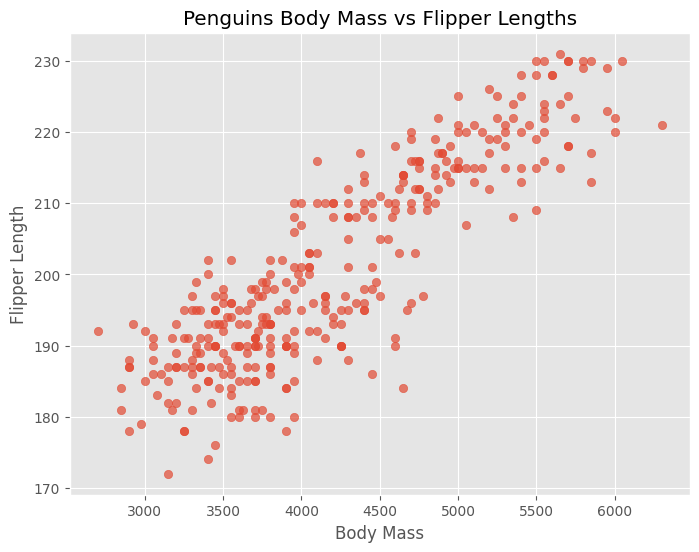

In [118]:
plt.figure(figsize=(8,6))
plt.scatter(data['body_mass_g'], data['flipper_length_mm'], alpha=0.7)
plt.title("Penguins Body Mass vs Flipper Lengths")
plt.xlabel("Body Mass")
plt.ylabel("Flipper Length")
plt.show()

We can clearly observe a positive correlation between Body Mass and Flipper Length. 

However, before proceeding directly with Linear Regression, it is necessary to preprocess our data first.

## **4. Data Preprocessing:**

From `data.info()`, we can see that both the ‘body_mass_g’ and ‘flipper_length_mm’ columns contain NaN / null values. We could also check this using the following Pandas methods:

In [119]:
print(f"The number of null values in 'body_mass_g' column: ", data['body_mass_g'].isnull().sum())
print(f"The number of null values in 'flipper_length_mm' column: ", data['flipper_length_mm'].isnull().sum())

The number of null values in 'body_mass_g' column:  0
The number of null values in 'flipper_length_mm' column:  0


To handle these missing values, we’ll use the .`dropna()` method:

In [120]:
data.dropna(subset=['body_mass_g', 'flipper_length_mm'])

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
337,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
338,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
339,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
340,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


Since we want to implement Linear Regression from scratch by using NumPy only, we have to extract the 'body_mass_g' feature and the 'flipper_length_mm' target variable as NumPy arrays:

In [121]:
X = data['body_mass_g'].to_numpy()
y = data['flipper_length_mm'].to_numpy()

Now, we will calculate the mean and standard deviation of the dataset `X`, and then visualize its distribution using a histogram. The plot includes markers to indicate the mean value and one standard deviation above and below the mean.

Mean value:  4201.754385964912
Standard deviation:  800.781229238452


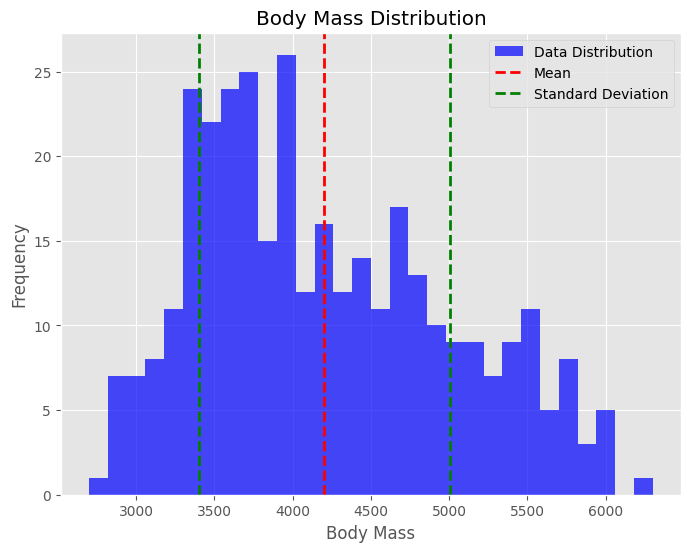

In [122]:
# Calculate mean and standard deviation
X_mean = np.mean(X)
X_std = np.std(X)

print(f"Mean value: ", X_mean)
print(f"Standard deviation: ", X_std)


# Plotting the histogram
plt.figure(figsize=(8,6))
plt.hist(X, bins=30, alpha=0.7, color='blue', label='Data Distribution')

# Marking the mean and standard deviation
plt.axvline(X_mean, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(X_mean + X_std, color='green', linestyle='dashed', linewidth=2, label='Standard Deviation')
plt.axvline(X_mean - X_std, color='green', linestyle='dashed', linewidth=2)

# Adding title and labels
plt.title("Body Mass Distribution")
plt.xlabel("Body Mass")
plt.ylabel("Frequency")


# Adding a legend and displaying the plot
plt.legend()
plt.show()

As we can see, the distribution is not perfectly normal. It has multiple peaks and skews slightly towards higher body mass. 

In this case, we need to standardize a dataset. Following standardization transforms data to have mean of 0 and standard deviation of 1, which can improve the performance of Linear Regression.

In [123]:
X_scaled = (X - X_mean) / X_std
print(f"Scaled array: ", X_scaled)

Scaled array:  [-5.64142077e-01 -5.01703051e-01 -1.18853234e+00 -9.38776233e-01
 -6.89020129e-01 -7.20239642e-01  5.90979904e-01 -9.07556720e-01
  6.02481830e-02 -1.12609331e+00 -6.26581103e-01 -1.25097136e+00
 -5.01703051e-01  2.47565261e-01 -6.26581103e-01 -9.38776233e-01
  3.72443313e-01 -1.09487380e+00 -2.19084302e-03 -1.00121526e+00
 -7.51459155e-01 -5.01703051e-01 -3.14385973e-01 -5.01703051e-01
 -5.01703051e-01 -8.13898181e-01 -1.25097136e+00 -1.31341039e+00
 -3.14385973e-01 -1.18853234e+00 -3.76824999e-01 -1.12609331e+00
 -3.76824999e-01 -1.09487380e+00 -6.46298690e-02 -3.14385973e-01
 -8.13898181e-01 -1.12609331e+00  5.59760391e-01 -1.31341039e+00
 -3.76824999e-01 -1.37584942e+00  2.47565261e-01 -1.50072747e+00
  4.97321365e-01 -9.69995746e-01 -1.53194698e+00 -9.38776233e-01
 -6.46298690e-02 -8.76337207e-01  1.22687209e-01 -9.38776233e-01
 -1.89507921e-01 -1.62560552e+00 -6.26581103e-01 -8.13898181e-01
 -5.01703051e-01 -1.68804455e+00 -5.64142077e-01 -1.31341039e+00
  2.475652

We can visualize it as well:

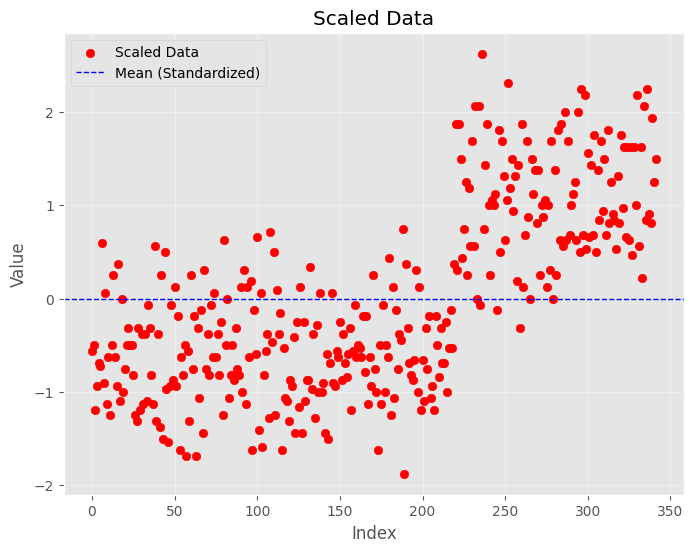

In [124]:
plt.figure(figsize=(8,6))

plt.scatter(range(len(X)), X_scaled, color='red', label='Scaled Data')

plt.axhline(y = 0, color='blue', linestyle='dashed', linewidth=1, label='Mean (Standardized)')
plt.title("Scaled Data")
plt.xlabel("Index")
plt.ylabel("Value")

plt.legend()
plt.grid(alpha=0.4)
plt.show()

## **5. Adding Intercept Term:**

In this section, we have to add a column of ones to feature column to account for the intercept term. This ensures that the model can learn the bias term (intercept) during training, which allows for a better fit to the data.

In [53]:
X_scaled = np.c_[np.ones(len(X)), X_scaled]
print(X_scaled)

[[ 1.00000000e+00 -5.64142077e-01]
 [ 1.00000000e+00 -5.01703051e-01]
 [ 1.00000000e+00 -1.18853234e+00]
 [ 1.00000000e+00 -9.38776233e-01]
 [ 1.00000000e+00 -6.89020129e-01]
 [ 1.00000000e+00 -7.20239642e-01]
 [ 1.00000000e+00  5.90979904e-01]
 [ 1.00000000e+00 -9.07556720e-01]
 [ 1.00000000e+00  6.02481830e-02]
 [ 1.00000000e+00 -1.12609331e+00]
 [ 1.00000000e+00 -6.26581103e-01]
 [ 1.00000000e+00 -1.25097136e+00]
 [ 1.00000000e+00 -5.01703051e-01]
 [ 1.00000000e+00  2.47565261e-01]
 [ 1.00000000e+00 -6.26581103e-01]
 [ 1.00000000e+00 -9.38776233e-01]
 [ 1.00000000e+00  3.72443313e-01]
 [ 1.00000000e+00 -1.09487380e+00]
 [ 1.00000000e+00 -2.19084302e-03]
 [ 1.00000000e+00 -1.00121526e+00]
 [ 1.00000000e+00 -7.51459155e-01]
 [ 1.00000000e+00 -5.01703051e-01]
 [ 1.00000000e+00 -3.14385973e-01]
 [ 1.00000000e+00 -5.01703051e-01]
 [ 1.00000000e+00 -5.01703051e-01]
 [ 1.00000000e+00 -8.13898181e-01]
 [ 1.00000000e+00 -1.25097136e+00]
 [ 1.00000000e+00 -1.31341039e+00]
 [ 1.00000000e+00 -3

## **6. Splitting Data into Training and Testing Sets:**

To train the model, we will use 80% of the data. We can implement the `split_data` function (from scratch) to split the dataset into a training set and a test set.

In [54]:
def split_data(X, y, train_size_ratio=0.8, random_state=42):
    np.random.seed(random_state)
    indices = np.arange(len(X))
    np.random.shuffle(indices)

    train_size = int(len(X) * train_size_ratio)
    train_index, test_index = indices[:train_size], indices[train_size:]

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data(X_scaled, y)

Note that we intentionally shuffle the dataset indices randomly to avoid bias.

## **7. Linear Regression with Gradient Descent:**

To implement **Linear Regression** from scratch, we define the `gradient_descent` function. This function optimizes the parameters (`theta`) by iteratively minimizing the **Mean Squared Error (MSE)**. Below is a detailed explanation:

### Function Parameters
- **`X`**: Feature matrix where rows represent samples and column represent feature.
- **`y`**: Target values corresponding to the feature matrix.
- **`learning_rate`**: A hyperparameter that determines the step size for updating model parameters. The default value is `0.01`.
- **`iterations_numb`**: Total number of iterations for running the gradient descent algorithm. Default value is `1000`.

In [109]:
def gradient_descent(X, y, learning_rate=0.01, iterations_numb=1000):
    theta = np.random.randn(len(X[0]))
    sample_numb = len(X)
    mse_history = []

    for iteration in range(iterations_numb):
        gradients = 2 / sample_numb * X.T @ (X @ theta - y)
        theta -= learning_rate * gradients

        mse = np.mean((X @ theta - y) ** 2)
        mse_history.append(mse)

    return theta, mse_history

### Key Steps in the Algorithm:
1. **Initialization**:
   - **`theta`**: Initialized randomly. Its length corresponds to the number of features in `X` (including the intercept).
   - **`sample_numb`**: Stores the number of training samples.
   - **`mse_history`**: A list to record the MSE after each iteration.

2. **Gradient Calculation**:
   For each iteration, the following calculations are performed:
   - **`X @ theta`**: Computes predicted values using the current parameters.
   - **`X @ theta - y`**: Finds the error between predicted and actual values.
   - **`X.T @ (X @ theta - y)`**: Calculates the gradient of the cost function with respect to `theta`.

3. **Parameter Update**:
   The parameters are updated using the gradient:
$$
\begin{align*}
\theta = \theta - \text{learning\_rate} \times \text{gradients}
\end{align*}
$$
   - The **`learning_rate`** determines the size of each step toward minimizing the error.

4. **Track Performance**:
   - At every iteration, the MSE is computed using the formula:
     $$ MSE = \frac{1}{n} \sum (y_{\text{true}} - y_{\text{predicted}})^2 $$
   - This value is added to `mse_history` to monitor convergence.

### Function Output:
- **`theta`**: The optimized parameters after all iterations.
- **`mse_history`**: A list of MSE values across iterations, useful for evaluating convergence and model performance.

By minimizing the MSE, the algorithm learns the best-fit parameters for the linear regression model. This function forms the foundation for making predictions on new data.

Let's now use this function to compute `theta` for our dataset:

In [97]:
theta, mse_history = gradient_descent(X_train, y_train)
print(theta)

[200.90149965  12.48341616]


We can also visualize MSE over iterations:

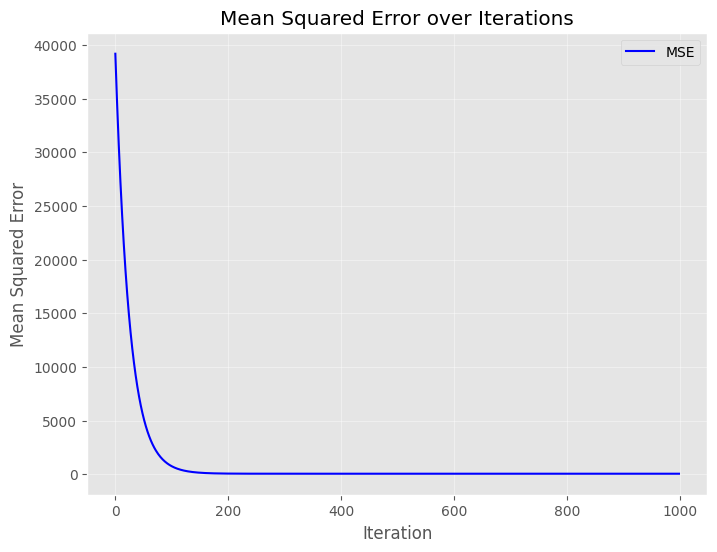

In [98]:
plt.figure(figsize=(8,6))
plt.plot(range(len(mse_history)), mse_history, label='MSE', color='blue')
plt.title("Mean Squared Error over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.grid(alpha=0.4)
plt.show()

In this step, we evaluate the performance of the trained linear regression model by comparing the true values (`y_test`) with the predicted values (`y_predicted`). This is done using a scatter plot for clear visualization.

In [101]:
# Evaluation
def predict(X, theta):
    return X @ theta

y_predicted = predict(X_test, theta)


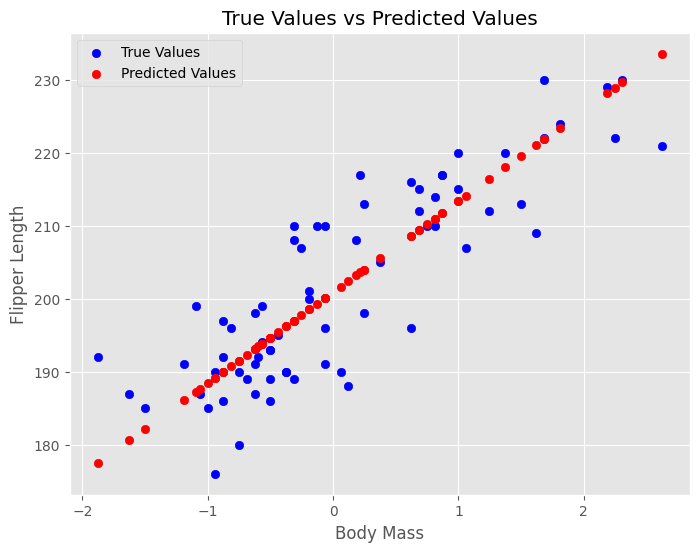

In [110]:
plt.figure(figsize=(8,6))
plt.scatter(X_test[:,1], y_test, color='blue', label='True Values')
plt.scatter(X_test[:,1], y_predicted, color='red', label='Predicted Values')
plt.title("True Values vs Predicted Values")
plt.xlabel("Body Mass")
plt.ylabel("Flipper Length")
plt.legend()
plt.show()

The scatter plot shows that the model has captured the relationship between body mass and flipper length effectively. However, we can also observe some deviation or spread between predicted and true values. They indicate areas where the model's accuracy could be improved.

We can evaluate overall performance of the model using two key methods:
1. Calculating the **Mean Squated Error (MSE)**.
2. Analyzing **Residuals** through visualization.

In [112]:
def mean_squared_error(y_true, y_predicted):
    return np.mean((y_true - y_predicted)**2)

MSE = mean_squared_error(y_test, y_predicted)
print(f"Mean Squared Error on the testing set: ", MSE)

Mean Squared Error on the testing set:  50.14913172439136


MSE of ~50 suggests the model has made decent predictions but with "room" for improvement.

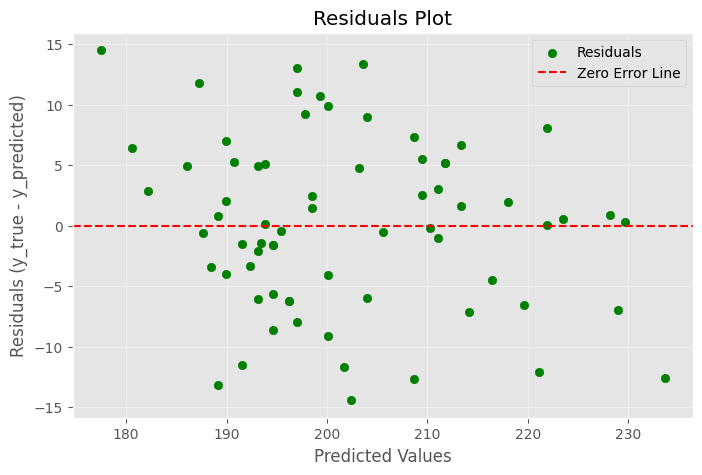

In [113]:
residuals = y_test - y_predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_predicted, residuals, color='green', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Error Line')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (y_true - y_predicted)')
plt.legend()
plt.grid(alpha=0.4)
plt.show()

Again, we can clearly observe that residuals rande approximately between -15 and 15, and are scattered around zero error line (red dashed line). 

Worth to mention that the residuals seem fairly randomly distributed. Overall, this could indicate that model's predictions are close to actual values, but there are still small deviations.

## **7. Conclusion and Possible Improvements:**

The implemented from scratch Linear Regression model performs reasonably well in predicting flipper length based on body mass. 

With an MSE of 50 and residuals scattered around zero, the results indicate that the model has captured the relationship between the features and target variable effectively. 

However, there are areas where improvements could further enhance the model's accuracy and robustness. 

Below are potential refinements:

### 1. Feature Engineering
   - Incorporate additional features from the dataset, such as species or culmen measurements, to capture more complex relationships in the data.

If additional features like species, or culmen measurements are included, non-linear models like `Decision Trees` or `Neural Networks` might be beneficial for capturing interactions between multiple variables.

### 2. Regularization
   - Introduce regularization techniques, such as L1 (Lasso) or L2 (Ridge) regularization, to prevent overfitting and improve generalization, particularly if more features are added.


